In [2]:
import time

import random
import numpy as np
import matplotlib.pyplot as plt

import argparse

In [94]:
def read_data(data_path, show=False):
    """Read the specified data (KQBF problem)"""
    # data_path = "./instances/kqbf/kqbf020"

    with open(data_path, "r") as file:
        lines = file.readlines()

    N = int(lines[0].strip())
    W = int(lines[1].strip())
    w = list(map(int, lines[2].strip().split()))
    A = []

    for i in range(N):
        row = list(map(int, lines[i + 3].strip().split()))
        A.append(row)

    max_length = max(len(sublist) for sublist in A)
    for sublist in A:
        sublist.extend([0] * (max_length - len(sublist)))

    matrix = np.zeros((max_length, max_length))
    for i in range(max_length):
        for j in range(i + 1):
            matrix[i][j] = A[i][j]
            matrix[j][i] = A[i][j]

    if show:
        print("N:", N)
        print("W:", W)
        print("w:", w)
        print("A:")
        for row in A:
            print(row)

    return N, W, np.array(w), np.array(matrix)

In [106]:
# Definindo a função objetivo QBF
# def objective_function(x, A):
#     return np.dot(x.T, np.dot(A, x))

def objective_function(x, A):
    return np.dot(x, np.dot(A, x.T))

# Definindo a restrição do problema
def constraint(x, w, W):
    return np.dot(x, w) <= W

def initialize_population(population_size, n):

    population = []
    for _ in range(population_size):

        x = np.random.randint(2, size=n)
        population.append(x)

    return population

In [217]:
def genetic_algorithm(population_size, number_generation, A, w, W):

    # Initialization

    n = len(w)
    population = initialize_population(population_size, n) 
    fitness_history = []

    best_solution = None
    best_fitness = float("-inf")

    # print("population:")
    # display(population)

    for generation in range(number_generation):

        # Evaluation
        fitness = [objective_function(x, A) for x in population]
        # fitness = []
        # for x in population:
        #     print("x", x, "dim", x.shape)
        #     print("A", A, "dim", A.shape)
        #     fitness.append(objective_function(x, A))

        feasible_population = [x for x in population if constraint(x, w, W)]

        # print(f"feasible population for generation {generation}")
        # display(feasible_population)
        
        # Selection 

        if feasible_population:

            feasible_fitness = [objective_function(x, A) for x in feasible_population]
            # Selecting parents with the highest feasible fitness
            parents = random.choices(feasible_population, weights=feasible_fitness, k=population_size)
        else:

            parents = []
            while len(parents) < population_size:
                # Restart the initial population until we find a feasible solution
                adjusted_population = initialize_population(population_size, n)
                potential_parents = random.choices(adjusted_population, weights=fitness)

                try:
                    if constraint(potential_parents, w, W):
                        parents.append(potential_parents)
                except:
                    continue

        # print(f"parents for generation {generation}")
        # display(parents)

        # Crossover/Recombination (Offspring)
                
        # offspring = []
        # for i in range(population_size):

        #     parent1, parent2 = random.choices(parents, k=2)
        #     child = np.array([random.choice([bit1, bit2]) for bit1, bit2 in zip(parent1, parent2)])

        #     offspring.append(child)
                
        offspring = []
        for _ in range(population_size):
            
            parent1, parent2 = random.sample(parents, 2)  # Use random.sample instead of random.choices

            # print(">>>>>>>>>>>>>>>>>>>>>>>>>")
            # print("p1, p2:", parent1, parent2)
            # print()
            
            child = np.array([random.choice([bit1, bit2]) for bit1, bit2 in zip(parent1, parent2)])

            offspring.append(child)

        # print(f"offspring for generation {generation}: {offspring}")
        # print(">>>>>>>>>>>>>>>>>>>>>>>>>")
        # print()

        # Mutation
            
        # mutation_rate = 1 / (generation + 1) # Dynamic mutation rate
        # for i in range(population_size):

        #     if random.random() < mutation_rate:
        #         offspring[i] = np.random.randint(2, size=len(offspring[i]))

        # Mutation
        mutation_rate = 1 / (generation + 1) # Dynamic mutation rate
        for i in range(population_size):

            if random.random() < mutation_rate:

                mutation_index = random.randint(0, len(offspring[i])-1)
                offspring[i][mutation_index] = 1 - offspring[i][mutation_index]  # Flip the bit at the mutation_index

    
        # Elitism
        if best_solution is not None:
            offspring[0] = best_solution # Best solution is preserved in next generation

        population = offspring

        # print(">>>>>>>>>>>>>>>>>>>>>>>>>")
        # print(f"population for generation {generation}:")
        # display(population)
        # print(">>>>>>>>>>>>>>>>>>>>>>>>>")

        # Find the best feasible solution
        feasible_solutions = [x for x in population if constraint(x, w, W)]
        # feasible_solutions = []
        # for x in population:
        #     print("x", x, "dim", x.shape)
        #     if constraint(x, w, W):
        #         feasible_solutions.append(x)

        if feasible_solutions:

            best_solution = max(feasible_solutions, key=lambda x: objective_function(x, A))
            # try:
            best_fitness = objective_function(best_solution, A)
            # except:
            #     best_fitness = float(np.sum(objective_function(best_solution, A)))

            try:
                best_fitness = float(np.sum(objective_function(best_solution, A)))
            except:
                pass

        # if best_fitness is not None:  # Only add scalar values to fitness_history

        #     fitness_history.append(best_fitness)
                
        print("best fitness", best_fitness)

        fitness_history.append(best_fitness)

    # Plot fitness progress
    plt.plot(range(1, number_generation+1), fitness_history)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("Genetic Algorithm - Fitness progress")
    plt.show()

    return best_solution, best_fitness


[12 16  4  2 11 14  2 15  6  2  8  2 14 16 11 14 10  0 20 14]
64

best fitness 147.0
best fitness 147.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
best fitness 160.0
bes

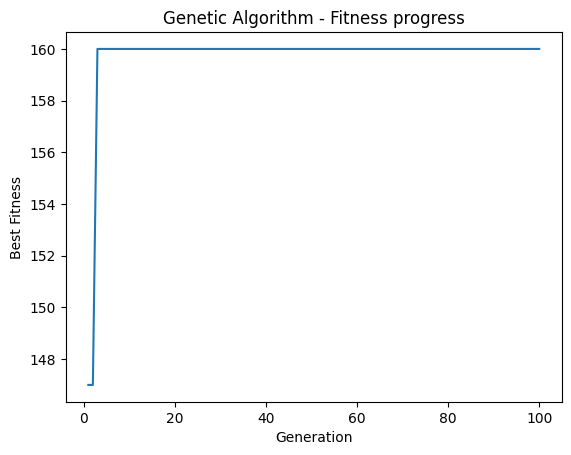

[1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0] 160.0


In [231]:
problem_instance = "kqbf020" # args.problem_instance
N, W, w, A = read_data(data_path=f"./instances/kqbf/{problem_instance}", show=False)
w = np.array(w)

print(w)
print(W)
print()

# Aplicando o algoritmo genético
best_solution, best_fitness = genetic_algorithm(1000, 100, A, w, W)

print(best_solution, best_fitness)